Train data shape:  (49000, 32, 32, 3)
Train labels shape:  (49000, 10) float32
Validation data shape:  (1000, 32, 32, 3)
Validation labels shape:  (1000, 10)
Test data shape:  (1000, 32, 32, 3)
Test labels shape:  (1000, 10)
Epoch 1/10
766/766 - 34s - loss: 1.7029 - accuracy: 0.4173 - val_loss: 1.1960 - val_accuracy: 0.5700
Epoch 2/10
766/766 - 34s - loss: 1.3045 - accuracy: 0.5447 - val_loss: 0.9603 - val_accuracy: 0.6520
Epoch 3/10
766/766 - 35s - loss: 1.1350 - accuracy: 0.6041 - val_loss: 0.8841 - val_accuracy: 0.6870
Epoch 4/10
766/766 - 35s - loss: 1.0233 - accuracy: 0.6416 - val_loss: 0.8362 - val_accuracy: 0.7070
Epoch 5/10
766/766 - 35s - loss: 0.9504 - accuracy: 0.6702 - val_loss: 0.8115 - val_accuracy: 0.7210
Epoch 6/10
766/766 - 42s - loss: 0.8842 - accuracy: 0.6889 - val_loss: 0.7649 - val_accuracy: 0.7470
Epoch 7/10
766/766 - 48s - loss: 0.8441 - accuracy: 0.7010 - val_loss: 0.7728 - val_accuracy: 0.7480
Epoch 8/10
766/766 - 48s - loss: 0.7961 - accuracy: 0.7204 - val_los

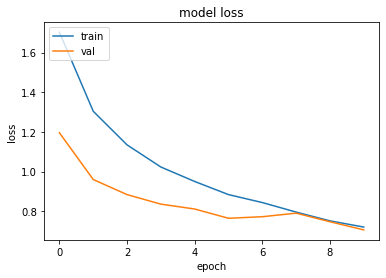

KeyError: 'acc'

<Figure size 432x288 with 0 Axes>

In [2]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
import keras
from keras import layers


def load_cifar10(num_training=49000, num_validation=1000, num_test=1000):
    # Fetch the CIFAR-10 dataset from the web
    cifar10 = keras.datasets.cifar10.load_data()
    (X_train, y_train), (X_test, y_test) = cifar10
    X_train = np.asarray(X_train, dtype=np.float32)
    y_train = np.asarray(y_train, dtype=np.int32).flatten()
    X_test = np.asarray(X_test, dtype=np.float32)
    y_test = np.asarray(y_test, dtype=np.int32).flatten()
    # Subsample the data
    mask = range(num_training, num_training + num_validation)
    X_val = X_train[mask]
    y_val = y_train[mask]
    mask = range(num_training)
    X_train = X_train[mask]
    y_train = y_train[mask]
    mask = range(num_test)
    X_test = X_test[mask]
    y_test = y_test[mask]
    # Normaliza the data: subtract the mean pixel and divide by std
    mean_pixel = X_train.mean(axis=(0, 1, 2), keepdims=True)
    std_pixel = X_train.std(axis=(0, 1, 2), keepdims=True)
    X_train = (X_train - mean_pixel) / std_pixel
    X_val = (X_val - mean_pixel) / std_pixel
    X_test = (X_test - mean_pixel) / std_pixel
    # one-hot the labels
    y_train = keras.utils.to_categorical(y_train, 10)
    y_val = keras.utils.to_categorical(y_val, 10)
    y_test = keras.utils.to_categorical(y_test, 10)

    return X_train, y_train, X_val, y_val, X_test, y_test


# Invoke the above function to get our data.
X_train, y_train, X_val, y_val, X_test, y_test = load_cifar10()
print('Train data shape: ', X_train.shape)
print('Train labels shape: ', y_train.shape, y_train.dtype)
print('Validation data shape: ', X_val.shape)
print('Validation labels shape: ', y_val.shape)
print('Test data shape: ', X_test.shape)
print('Test labels shape: ', y_test.shape)


def simple_model(input_shape, num_classes=10):
    # Define the input placeholder as a tensor with shape input_shape.
    X_input = layers.Input(input_shape)

    X = layers.Conv2D(filters=16, kernel_size=5, padding='same',
                      activation='relu')(X_input)
    X = layers.BatchNormalization(axis=3)(X)
    X = layers.MaxPool2D(strides=(2, 2))(X)
    X = layers.Conv2D(filters=32, kernel_size=5, padding='same',
                      activation='relu')(X)
    X = layers.BatchNormalization(axis=3)(X)
    X = layers.MaxPool2D(strides=(2, 2))(X)
    X = layers.Flatten()(X)
    X = layers.Dense(500)(X)
    X = layers.BatchNormalization(scale=False)(X)
    X = layers.Activation(activation='relu')(X)
    X = layers.Dropout(rate=0.7)(X)
    X = layers.Dense(num_classes, activation='softmax')(X)

    model = keras.Model(X_input, X)

    return model


model = simple_model((32, 32, 3), 10)
model.compile(optimizer=keras.optimizers.SGD(lr=1e-2, momentum=0.9, nesterov=True),
              loss=keras.losses.categorical_crossentropy, metrics=["accuracy"])
history = model.fit(X_train, y_train, epochs=10, batch_size=64, verbose=2, validation_data=(X_val, y_val))
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title("model loss")
plt.ylabel("loss")
plt.xlabel("epoch")
plt.legend(["train","val"],loc="upper left")
plt.show()
plt.figure()
plt.plot(history.history['acc'])
plt.plot(history.history['val_acc'])
plt.title("model acc")
plt.ylabel("acc")
plt.xlabel("epoch")
plt.legend(["train","val"],loc="upper left")
plt.show()

preds = model.evaluate(x=X_train, y=y_train)
print()
print("Train Loss = " + str(preds[0]))
print("Train Accuracy = " + str(preds[1]))

preds = model.evaluate(x=X_val, y=y_val)
print()
print("Val Loss = " + str(preds[0]))
print("Val Accuracy = " + str(preds[1]))